In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
#data analysis libraries
import numpy as np
import pandas as pd

from scipy.stats import norm, skew
from scipy import stats

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warning
import warnings
warnings.filterwarnings(action="ignore")


# Read in and Explore the Data

In [3]:
#import train and test CSV files
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

#take a look at the training data
df_train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


# Data Processing

In [4]:
#check for duplicate IDs
idsUni = len(set(df_train.Id))
idsTotal = len(df_train.Id)
idsDupli = idsUni - idsTotal
print('There are {} duplicate Ids in the training data'.format(idsDupli))

#save the 'Id' column, then drop them
df_train_Id = df_train['Id']
df_test_Id = df_test['Id']
df_train.drop('Id', axis = 1, inplace = True)
df_test.drop('Id', axis = 1, inplace = True)

#now we check the size of df_train and df_test
print('The train data size: {}'.format(df_train.shape))
print('The test data size: {}'.format(df_test.shape))

There are 0 duplicate Ids in the training data
The train data size: (1460, 80)
The test data size: (1459, 79)


In [5]:
#get a list of the features within the dataset
print(df_train.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
#see the first 5 of the train dataset to get an idea of the variables
df_train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#see the first 5 of the test dataset
df_test.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<AxesSubplot:>

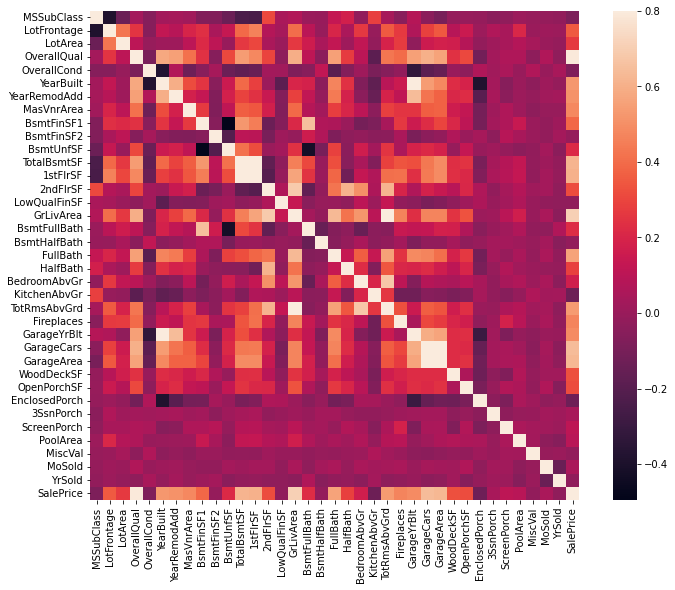

In [8]:
#correlation map
corrmat = df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8, square=True)

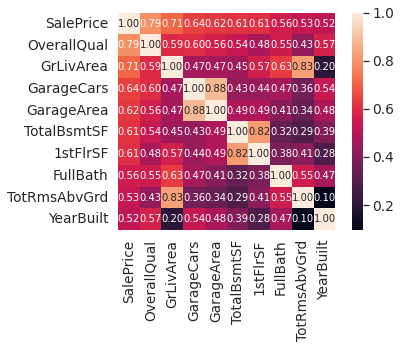

In [9]:
#saleprice correlation
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

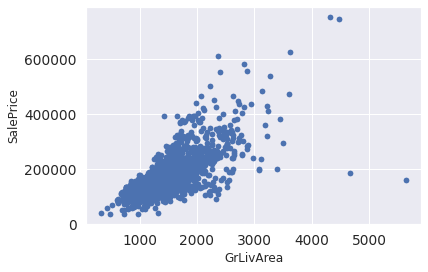

In [10]:
data = pd.concat({"GrLivArea":df_train, "SalePrice":df_train})
data.plot(x = "GrLivArea", y = "SalePrice", kind = "scatter")
plt.ylabel('SalePrice', fontsize=12)
plt.xlabel('GrLivArea', fontsize=12)
plt.show()

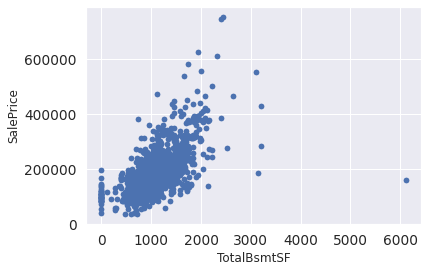

In [11]:
data = pd.concat({"TotalBsmtSF":df_train, "SalePrice":df_train})
data.plot(x = "TotalBsmtSF", y = "SalePrice", kind = "scatter")
plt.ylabel('SalePrice', fontsize=12)
plt.xlabel('TotalBsmtSF', fontsize=12)
plt.show()

In [12]:
#Deleting outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

df_train = df_train.drop(df_train[(df_train['TotalBsmtSF']>4000)].index)

In [13]:
#check the size of df_train after deleting outliers
print('The train data size: {}'.format(df_train.shape))

The train data size: (1458, 80)


Skewness: 1.881296
Kurtosis: 6.523067


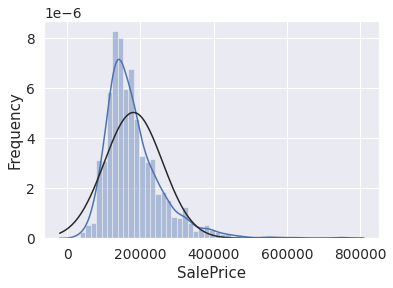

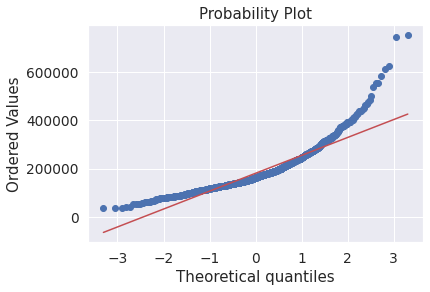

In [14]:
# Skew and kurt
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

#check histogrom of saleprice
sns.distplot(df_train['SalePrice'], fit = norm)
plt.ylabel('Frequency')
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

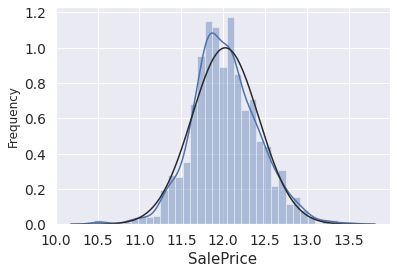

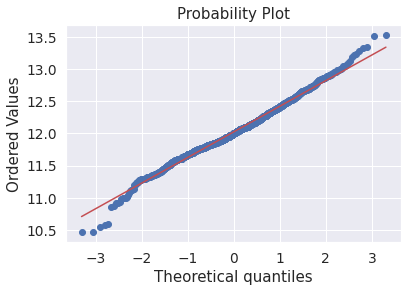

In [15]:
#we use log1p function for 'SalePrice' column
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

#then plot the target again
sns.distplot(df_train['SalePrice'], fit = norm)
plt.ylabel('Frequency', fontsize=12)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

In [16]:
n_train = df_train.shape[0]
n_test = df_test.shape[0]
y_train = df_train['SalePrice'].values
df_train.drop('SalePrice', axis=1, inplace=True)

#before handling missing data, we connect test and training data
df_all = pd.concat((df_train, df_test)).reset_index(drop = True)
print('df_all siza: {}'.format(df_all.shape))

df_all siza: (2917, 79)


In [17]:
#missing data
df_all_NA = pd.isnull(df_all).sum().sort_values(ascending=False)
NA_percent = ((df_all_NA / len(df_all))*100).sort_values(ascending=False)
df_all_NA = pd.concat([df_all_NA, NA_percent], axis=1, keys=['Number', 'Percent'])
#df_all_NA = df_all_NA.drop(df_all_NA[df_all_NA==0].index)
print('df_all_NA siza: {}'.format(df_all_NA.shape))

df_all_NA siza: (79, 2)


In [18]:
df_all_NA.head(35)

,Number,Percent
PoolQC,2908,99.691464
MiscFeature,2812,96.400411
Alley,2719,93.212204
Fence,2346,80.425094
FireplaceQu,1420,48.680151
LotFrontage,486,16.660953
GarageYrBlt,159,5.450806
GarageFinish,159,5.450806
GarageQual,159,5.450806
GarageCond,159,5.450806


In [19]:
#drop some feature
df_all = df_all.drop((df_all_NA[df_all_NA['Percent'] > 40].index), 1)
print('df_all size: {}'.format(df_all.shape))

df_all size: (2917, 74)


In [20]:
#input missing value


df_all['LotFrontage'] = df_all.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

for c in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath','BsmtHalfBath', 'MasVnrArea'):
    df_all[c] = df_all[c].fillna(0)
    
for c in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'MasVnrType', 'MSSubClass'):
    df_all[c] = df_all[c].fillna('None')

df_all['MSZoning'] = df_all['MSZoning'].fillna(df_all['MSZoning'].mode()[0])

df_all = df_all.drop(['Utilities'], axis=1)

df_all["Functional"] = df_all["Functional"].fillna("Typ")

df_all['Electrical'] = df_all['Electrical'].fillna(df_all['Electrical'].mode()[0])

df_all['KitchenQual'] = df_all['KitchenQual'].fillna(df_all['KitchenQual'].mode()[0])

df_all['Exterior1st'] = df_all['Exterior1st'].fillna(df_all['Exterior1st'].mode()[0])

df_all['Exterior2nd'] = df_all['Exterior2nd'].fillna(df_all['Exterior2nd'].mode()[0])

df_all['SaleType'] = df_all['SaleType'].fillna(df_all['SaleType'].mode()[0])

In [21]:
#check remains missing value
print(pd.isnull(df_all).sum().sort_values(ascending=False))

MSSubClass       0
HeatingQC        0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
                ..
ExterQual        0
MasVnrArea       0
MasVnrType       0
Exterior2nd      0
SaleCondition    0
Length: 73, dtype: int64


In [22]:
#convert some numerical feature to categorical

df_all['OverallCond'] = df_all['OverallCond'].astype(str)
df_all['MSSubClass'] = df_all['MSSubClass'].astype(str)
df_all['YrSold'] = df_all['YrSold'].astype(str)
df_all['MoSold'] = df_all['MoSold'].astype(str)

In [23]:
#encode some categorical feature as ordered number
from sklearn.preprocessing import LabelEncoder

cols = ('BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_all[c].values)) 
    df_all[c] = lbl.transform(list(df_all[c].values))
     
print('df_all size: {}'.format(df_all.shape))

df_all size: (2917, 73)


In [24]:
#skew from the feature
numeric_feature = df_all.dtypes[df_all.dtypes != 'object'].index
skewed_feature = df_all[numeric_feature].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'skew': skewed_feature})
skewness.head(10)

,skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [25]:
#Box Cox
skewness = skewness[abs(skewness) > 0.5]
print('{} skewed numerical features for Box Cox transform'.format(len(skewness)))

from scipy.special import boxcox1p
lam = 0.15
for f in skewness.index:
    df_all[f] = boxcox1p(df_all[f], lam)

54 skewed numerical features for Box Cox transform


In [26]:
#create dummy feature for categorical
df_all = pd.get_dummies(df_all)
print('df_all size: {}'.format(df_all.shape))

df_all size: (2917, 210)


In [27]:
#partition the dataset into train and test 
X_train = df_all[:n_train]
X_test = df_all[n_train:]

In [28]:
#cross validation
from sklearn.model_selection import KFold, cross_val_score, train_test_split

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = 5))
    return rmse

# Modelling

In [29]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error

In [30]:
#LASSO Regression
lasso = Lasso(alpha =0.0005, random_state=1)
score_lasso = rmse_cv(lasso)

In [31]:
#Elastic Net Regression
ENet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
score_ENet = rmse_cv(ENet)

In [32]:
#Kernel Ridge Regression
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score_KRR = rmse_cv(KRR)


In [33]:
#Gradient Boosting Regression
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score_GBoost = rmse_cv(GBoost)


In [34]:
#XGBoost
#import xgboost as xgb
#model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                             learning_rate=0.05, max_depth=3, 
#                             min_child_weight=1.7817, n_estimators=2200,
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, silent=1,
#                             random_state =7, nthread = -1)
#score_xgb = rmse_cv(model_xgb)


In [35]:
#LightGBM
#import lightgbm as lgb
#model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                              learning_rate=0.05, n_estimators=720,
#                              max_bin = 55, bagging_fraction = 0.8,
#                             bagging_freq = 5, feature_fraction = 0.2319,
#                              feature_fraction_seed=9, bagging_seed=9,
#                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
#score_lgb = rmse_cv(model_lgb)


In [36]:
models = pd.DataFrame({
    'Model': ['LASSO Regression', 'Elastic Net Regression', 'Kernel Ridge Regression', 
              'Gradient Boosting Regression'],
    'Score': [score_lasso.mean(), score_ENet.mean(), score_KRR.mean(), score_GBoost.mean()]})
models.sort_values(by = 'Score', ascending=True)

,Model,Score
1,Elastic Net Regression,0.114265
0,LASSO Regression,0.114379
2,Kernel Ridge Regression,0.114779
3,Gradient Boosting Regression,0.116102


In [37]:
def get_stacking():
    #define the base models
    level0 = list()
    level0.append(('ENet', ENet))
    level0.append(('GBoost', GBoost))
    level0.append(('KRR', KRR))
    level1 = lasso
    
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [38]:
stacking_model = get_stacking()
score_stack = rmse_cv(stacking_model)
print('Staching Model score: {}'.format(score_stack.mean()))

Staching Model score: 0.10846898052450515


In [39]:
stacking_model.fit(X_train.values, y_train)
stacking_y_pred = stacking_model.predict(X_train.values)
stacking_pred = np.expm1(stacking_model.predict(X_test.values))
print(np.sqrt(mean_squared_error(y_train, stacking_y_pred)))

0.07094373567443699


In [40]:
#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({'Id': df_test_Id, 'SalePrice': stacking_pred})
output.to_csv('submission.csv', index = False)

Some of the notebooks I read:
* [Comprehensive Data Exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/notebook)
* [A Study on Regression Applied to the Ames Dataset](https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset)
* [Stacked Regressions](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard/notebook)
* [Regularized Linear Models](https://www.kaggle.com/apapiu/regularized-linear-models)